In [4]:
# import logging
# import gensim
# from gensim.models import word2vec, KeyedVectors
# import pandas as pd
# import nltk
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# # import pkuseg
# import numpy as np
# from nltk.tokenize import MWETokenizer
# import itertools
# from gensim.models import KeyedVectors
# from gensim.models import Word2Vec
# from gensim.models.word2vec import LineSentence
# from sklearn.manifold import TSNE

In [7]:
import numpy as np
import networkx as nx
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [8]:
# model = word2vec.Word2Vec(sentences, vector_size=100, window=10,sg=1,sample=1e-3,epochs=5)
# model.wv.save_word2vec_format("word2vec06072.txt")
model = KeyedVectors.load_word2vec_format('million.txt')
# for key in model.similar_by_word('MAPbI3',topn=8000):
#     print(key)

In [9]:
for key, value in model.most_similar('12-propanediol', topn=8000):
    print(key)

13-propanediol
glycerol
13-butanediol
acetol
1-propanol
12-pentanediol
23-butanediol
12-propylene
12-PD
propanediol
-butyraldehyde
12-PG
ethanediol
1-butanol
isobutanol
12-butanediol
12-PDO
124-butanetriol
14-butanediol
propanols
propanol
propanediols
15-pentanediol
monoethyl
12-ethanediol
25-hexanediol
2-pentanol
1234-butanetetrol
dipropylene
BDO
glyceric
2-butanol
γ-valerolactone
2-hexanol
cyclohexanol
n-butanol
3-pentanol
2-methyl-2-butanol
iso-propanol
monopropyl
d-mannitol
123-propanetriol
monobutyl
propane-13-diol
tartronic
pentane-15-diol
1-heptanol
1-octadecanol
3-methyl-3-buten-1-ol
13-Propanediol
n-propanol
13-PDO
2-propanol
tert-amyl
1-hexanol
propane-12-diol
3-hydroxypropionic
HJ06
2-methyl-1-butanol
levulinate
tert-butanol
25-dimethyltetrahydrofuran
butyraldehyde
monoethylene
3-methyl-1-butanol
12-octanediol
monoesters
2-heptanol
sorbitol
mono-ethyl
2-methyl-2-propanol
1-hexadecanol
12-diethoxyethane
propylene
sec-butanol
isobutyric
hydroxyacetone
13-PD
glycol
C_3–C_10
1-a

In [10]:
print(model.similarity('CH_3NH_3PbI_3', 'NMP'))
print(model.similarity('Rb', 'battery'))
# print(model.similarity('Na2GeF4', 'battery'))

0.18378127
0.089437485


In [11]:
ion = r'Ion_split.csv'
ion =pd.DataFrame(pd.read_csv(ion))
ion

,Ion
0,Li+
1,Zn2+
2,K+
3,Na+
4,Al3+
...,...
635,Na+
636,Al3+
637,Ca2+
638,Mg2+


In [12]:
ele= r'Element_split.csv'
ele=pd.DataFrame(pd.read_csv(ele))
ele

,A1,A2,B,X1,X2,X3,X4
0,Li,Li,Ge,F,F,F,F
1,Li,Li,Ge,F,F,F,F
2,Li,Li,Ge,F,F,F,F
3,Li,Li,Ge,F,F,F,F
4,Li,Li,Ge,F,F,F,F
...,...,...,...,...,...,...,...
635,Rb,Rb,Sn,Cl,Cl,I,I
636,Rb,Rb,Sn,Cl,Cl,I,I
637,Rb,Rb,Sn,Cl,Cl,I,I
638,Rb,Rb,Sn,Cl,Cl,I,I


In [13]:
print(model.similarity('Li', 'NMP'))
print(model.similarity('Rb', 'battery'))

0.20794824
0.089437485


In [14]:
def cos(x):
    return model.similarity(x, 'stable')

# 对DataFrame中的每个元素应用这个函数
stable = ele.applymap(cos)
stable = stable.add_prefix('stable_')
# 打印处理后的DataFrame
stable.to_csv('stable.csv')
stable

,stable_A1,stable_A2,stable_B,stable_X1,stable_X2,stable_X3,stable_X4
0,0.223831,0.223831,0.171444,0.293168,0.293168,0.293168,0.293168
1,0.223831,0.223831,0.171444,0.293168,0.293168,0.293168,0.293168
2,0.223831,0.223831,0.171444,0.293168,0.293168,0.293168,0.293168
3,0.223831,0.223831,0.171444,0.293168,0.293168,0.293168,0.293168
4,0.223831,0.223831,0.171444,0.293168,0.293168,0.293168,0.293168
...,...,...,...,...,...,...,...
635,0.132393,0.132393,0.245900,0.186011,0.186011,0.246442,0.246442
636,0.132393,0.132393,0.245900,0.186011,0.186011,0.246442,0.246442
637,0.132393,0.132393,0.245900,0.186011,0.186011,0.246442,0.246442
638,0.132393,0.132393,0.245900,0.186011,0.186011,0.246442,0.246442


In [15]:
def cos(x):
    return model.similarity(x, 'unstable')

# 对DataFrame中的每个元素应用这个函数
unstable = ele.applymap(cos)
unstable = unstable.add_prefix('unstable_')
# 打印处理后的DataFrame
unstable.to_csv('unstable.csv')
unstable

,unstable_A1,unstable_A2,unstable_B,unstable_X1,unstable_X2,unstable_X3,unstable_X4
0,0.130392,0.130392,0.172979,0.153621,0.153621,0.153621,0.153621
1,0.130392,0.130392,0.172979,0.153621,0.153621,0.153621,0.153621
2,0.130392,0.130392,0.172979,0.153621,0.153621,0.153621,0.153621
3,0.130392,0.130392,0.172979,0.153621,0.153621,0.153621,0.153621
4,0.130392,0.130392,0.172979,0.153621,0.153621,0.153621,0.153621
...,...,...,...,...,...,...,...
635,0.136974,0.136974,0.197647,0.139181,0.139181,0.144596,0.144596
636,0.136974,0.136974,0.197647,0.139181,0.139181,0.144596,0.144596
637,0.136974,0.136974,0.197647,0.139181,0.139181,0.144596,0.144596
638,0.136974,0.136974,0.197647,0.139181,0.139181,0.144596,0.144596


In [16]:
def cos(x):
    return model.similarity(x, 'battery')

# 对DataFrame中的每个元素应用这个函数
battery = ele.applymap(cos)
battery = battery.add_prefix('battery_')
# 打印处理后的DataFrame
battery.to_csv('solar.csv')
battery

,battery_A1,battery_A2,battery_B,battery_X1,battery_X2,battery_X3,battery_X4
0,0.432901,0.432901,0.081297,0.220266,0.220266,0.220266,0.220266
1,0.432901,0.432901,0.081297,0.220266,0.220266,0.220266,0.220266
2,0.432901,0.432901,0.081297,0.220266,0.220266,0.220266,0.220266
3,0.432901,0.432901,0.081297,0.220266,0.220266,0.220266,0.220266
4,0.432901,0.432901,0.081297,0.220266,0.220266,0.220266,0.220266
...,...,...,...,...,...,...,...
635,0.089437,0.089437,0.196217,0.066645,0.066645,0.124107,0.124107
636,0.089437,0.089437,0.196217,0.066645,0.066645,0.124107,0.124107
637,0.089437,0.089437,0.196217,0.066645,0.066645,0.124107,0.124107
638,0.089437,0.089437,0.196217,0.066645,0.066645,0.124107,0.124107


In [17]:
def cos(x):
    return model.similarity(x, 'solar')

# 对DataFrame中的每个元素应用这个函数
solar = ele.applymap(cos)
solar = solar.add_prefix('solar_')
# 打印处理后的DataFrame
solar.to_csv('solar.csv')
solar

,solar_A1,solar_A2,solar_B,solar_X1,solar_X2,solar_X3,solar_X4
0,0.219097,0.219097,0.214372,0.140192,0.140192,0.140192,0.140192
1,0.219097,0.219097,0.214372,0.140192,0.140192,0.140192,0.140192
2,0.219097,0.219097,0.214372,0.140192,0.140192,0.140192,0.140192
3,0.219097,0.219097,0.214372,0.140192,0.140192,0.140192,0.140192
4,0.219097,0.219097,0.214372,0.140192,0.140192,0.140192,0.140192
...,...,...,...,...,...,...,...
635,0.038164,0.038164,0.152653,0.088521,0.088521,0.164982,0.164982
636,0.038164,0.038164,0.152653,0.088521,0.088521,0.164982,0.164982
637,0.038164,0.038164,0.152653,0.088521,0.088521,0.164982,0.164982
638,0.038164,0.038164,0.152653,0.088521,0.088521,0.164982,0.164982


In [18]:
def cos(x):
    return model.similarity(x, 'photo')

# 对DataFrame中的每个元素应用这个函数
photo = ele.applymap(cos)
photo = photo.add_prefix('photo_')
# 打印处理后的DataFrame
photo.to_csv('photo.csv')
photo

,photo_A1,photo_A2,photo_B,photo_X1,photo_X2,photo_X3,photo_X4
0,0.224388,0.224388,0.271318,0.159462,0.159462,0.159462,0.159462
1,0.224388,0.224388,0.271318,0.159462,0.159462,0.159462,0.159462
2,0.224388,0.224388,0.271318,0.159462,0.159462,0.159462,0.159462
3,0.224388,0.224388,0.271318,0.159462,0.159462,0.159462,0.159462
4,0.224388,0.224388,0.271318,0.159462,0.159462,0.159462,0.159462
...,...,...,...,...,...,...,...
635,0.134144,0.134144,0.228226,0.169019,0.169019,0.175447,0.175447
636,0.134144,0.134144,0.228226,0.169019,0.169019,0.175447,0.175447
637,0.134144,0.134144,0.228226,0.169019,0.169019,0.175447,0.175447
638,0.134144,0.134144,0.228226,0.169019,0.169019,0.175447,0.175447


In [19]:
def cos(x):
    return model.similarity(x, 'rechargeable')

# 对DataFrame中的每个元素应用这个函数
rechargeable = ele.applymap(cos)
rechargeable = rechargeable.add_prefix('rechargeable_')
# 打印处理后的DataFrame
rechargeable.to_csv('photo.csv')
rechargeable

,rechargeable_A1,rechargeable_A2,rechargeable_B,rechargeable_X1,rechargeable_X2,rechargeable_X3,rechargeable_X4
0,0.463461,0.463461,0.109965,0.182440,0.182440,0.182440,0.182440
1,0.463461,0.463461,0.109965,0.182440,0.182440,0.182440,0.182440
2,0.463461,0.463461,0.109965,0.182440,0.182440,0.182440,0.182440
3,0.463461,0.463461,0.109965,0.182440,0.182440,0.182440,0.182440
4,0.463461,0.463461,0.109965,0.182440,0.182440,0.182440,0.182440
...,...,...,...,...,...,...,...
635,0.154243,0.154243,0.215596,0.139506,0.139506,0.123947,0.123947
636,0.154243,0.154243,0.215596,0.139506,0.139506,0.123947,0.123947
637,0.154243,0.154243,0.215596,0.139506,0.139506,0.123947,0.123947
638,0.154243,0.154243,0.215596,0.139506,0.139506,0.123947,0.123947


In [20]:
def cos(x):
    return model.similarity(x, 'adsorption')

# 对DataFrame中的每个元素应用这个函数
adsorption = ele.applymap(cos)
adsorption = adsorption.add_prefix('adsorption_')
# 打印处理后的DataFrame
adsorption.to_csv('adsorption.csv')
adsorption

,adsorption_A1,adsorption_A2,adsorption_B,adsorption_X1,adsorption_X2,adsorption_X3,adsorption_X4
0,0.198009,0.198009,0.124334,0.178640,0.178640,0.178640,0.178640
1,0.198009,0.198009,0.124334,0.178640,0.178640,0.178640,0.178640
2,0.198009,0.198009,0.124334,0.178640,0.178640,0.178640,0.178640
3,0.198009,0.198009,0.124334,0.178640,0.178640,0.178640,0.178640
4,0.198009,0.198009,0.124334,0.178640,0.178640,0.178640,0.178640
...,...,...,...,...,...,...,...
635,0.121318,0.121318,0.162687,0.242902,0.242902,0.143121,0.143121
636,0.121318,0.121318,0.162687,0.242902,0.242902,0.143121,0.143121
637,0.121318,0.121318,0.162687,0.242902,0.242902,0.143121,0.143121
638,0.121318,0.121318,0.162687,0.242902,0.242902,0.143121,0.143121


In [21]:
def cos(x):
    return model.similarity(x, 'diffusion')

# 对DataFrame中的每个元素应用这个函数
diffusion = ele.applymap(cos)
diffusion = diffusion.add_prefix('diffusion_')
# 打印处理后的DataFrame
diffusion.to_csv('diffusion.csv')
diffusion

,diffusion_A1,diffusion_A2,diffusion_B,diffusion_X1,diffusion_X2,diffusion_X3,diffusion_X4
0,0.181405,0.181405,0.119448,0.123206,0.123206,0.123206,0.123206
1,0.181405,0.181405,0.119448,0.123206,0.123206,0.123206,0.123206
2,0.181405,0.181405,0.119448,0.123206,0.123206,0.123206,0.123206
3,0.181405,0.181405,0.119448,0.123206,0.123206,0.123206,0.123206
4,0.181405,0.181405,0.119448,0.123206,0.123206,0.123206,0.123206
...,...,...,...,...,...,...,...
635,0.056430,0.056430,0.197066,0.069521,0.069521,0.155857,0.155857
636,0.056430,0.056430,0.197066,0.069521,0.069521,0.155857,0.155857
637,0.056430,0.056430,0.197066,0.069521,0.069521,0.155857,0.155857
638,0.056430,0.056430,0.197066,0.069521,0.069521,0.155857,0.155857


In [22]:
def cos(x):
    return model.similarity(x, 'intercalation')

# 对DataFrame中的每个元素应用这个函数
intercalation = ele.applymap(cos)
intercalation = intercalation.add_prefix('intercalation_')
# 打印处理后的DataFrame
intercalation.to_csv('intercalation.csv')
intercalation

,intercalation_A1,intercalation_A2,intercalation_B,intercalation_X1,intercalation_X2,intercalation_X3,intercalation_X4
0,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
1,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
2,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
3,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
4,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
...,...,...,...,...,...,...,...
635,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
636,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
637,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
638,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553


In [23]:
data= r'all3_clf_0.1-3.csv'
data=pd.DataFrame(pd.read_csv(data))
features=data.iloc[:,0:-1] 
features

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,92,93,94,95,96,97,98,99,100,101
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0,0,0,0,0,0,0,0,0,0
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0,0,0,0,0,0,0,0,0,0
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0,0,0,0,0,0,0,0,0,0
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0,0,0,0,0,0,0,0,0,0
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0,0,0,0,0,0,0,0,0,0
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0,0,0,0,0,0,0,0,0,0
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0,0,0,0,0,0,0,0,0,0


In [24]:
target=data.iloc[:,-1] 
target=pd.DataFrame(target)
target

,Adsorption energy(ev)
0,0
1,0
2,0
3,0
4,0
...,...
635,0
636,0
637,0
638,0


In [25]:
merge_feature = pd.concat([features, battery, stable, unstable, solar, photo, adsorption, diffusion, intercalation], axis=1)
merge_feature

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,diffusion_X2,diffusion_X3,diffusion_X4,intercalation_A1,intercalation_A2,intercalation_B,intercalation_X1,intercalation_X2,intercalation_X3,intercalation_X4
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0.123206,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0.123206,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0.123206,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0.123206,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0.123206,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0.069521,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0.069521,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0.069521,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0.069521,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553


In [27]:
data = pd.concat([merge_feature, target], axis=1)
data.to_csv('data.csv')
data

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,diffusion_X3,diffusion_X4,intercalation_A1,intercalation_A2,intercalation_B,intercalation_X1,intercalation_X2,intercalation_X3,intercalation_X4,Adsorption energy(ev)
0,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248,0
1,14.000000,9,32,23,6.000000,9,65.142857,2,94,92,...,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248,0
2,22.285714,3,82,79,17.061224,17,65.571429,1,94,93,...,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248,0
3,17.714286,3,82,79,18.367347,9,65.000000,1,93,92,...,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248,0
4,20.000000,9,82,73,17.714286,9,65.285714,2,93,91,...,0.123206,0.123206,0.359712,0.359712,0.130798,0.054248,0.054248,0.054248,0.054248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15.428571,9,50,41,9.877551,9,65.142857,2,93,91,...,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553,0
636,12.857143,9,32,23,5.469388,9,65.000000,2,93,91,...,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553,0
637,13.142857,3,50,47,10.530612,9,64.857143,1,93,92,...,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553,0
638,11.714286,3,32,29,7.306122,9,64.857143,1,94,93,...,0.155857,0.155857,0.162604,0.162604,0.207387,0.084954,0.084954,0.080553,0.080553,0


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_Data=data.iloc[:,:]
global corMat
corMat = pd.DataFrame(all_Data.corr())  #corr 求相关系数矩阵
corMat.to_csv('heatmap-before.csv')
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plt.savefig('heatmap-before.png', dpi=300, bbox_inches = 'tight')
plt.close()

In [29]:
# 特征选择！！！使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 20
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("特征是否被选中：\n", rfe.support_)                                          # ndarray
print("获取的数据特征尺寸:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("最后的特征s_rfe:", r.Features.values)                                        # ndarray
print("目标target:", target)
print("rfe后的总数据data_rfe:", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

特征是否被选中：
 [False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False False False False False
  True False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fals

In [30]:
data_rfe

,MagpieData avg_dev MeltingT,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,Ion Density,Ion Firstlonization,battery_A2,battery_X3,stable_X3,stable_X4,...,solar_A1,solar_B,solar_X3,photo_B,photo_X4,adsorption_B,adsorption_X4,diffusion_A1,diffusion_X3,Adsorption energy(ev)
0,162.153469,3.142857,115.714286,2.418571,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,...,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206,0
1,278.214694,2.714286,103.571429,2.710000,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,...,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206,0
2,162.153469,3.142857,115.714286,2.418571,7.1300,9.3942,0.432901,0.220266,0.293168,0.293168,...,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206,0
3,219.998367,2.571429,90.000000,2.887143,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,...,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206,0
4,192.955102,2.857143,100.857143,2.872857,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,...,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,177.358367,2.714286,99.857143,2.820000,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,...,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857,0
636,292.675918,2.571429,97.142857,2.827143,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,...,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857,0
637,204.401633,2.428571,89.000000,2.834286,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,...,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857,0
638,305.257959,2.428571,92.714286,2.724286,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,...,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857,0


In [31]:
s_rfe

,MagpieData avg_dev MeltingT,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,Ion Density,Ion Firstlonization,battery_A2,battery_X3,stable_X3,stable_X4,unstable_X1,solar_A1,solar_B,solar_X3,photo_B,photo_X4,adsorption_B,adsorption_X4,diffusion_A1,diffusion_X3
0,162.153469,3.142857,115.714286,2.418571,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,0.153621,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206
1,278.214694,2.714286,103.571429,2.710000,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,0.153621,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206
2,162.153469,3.142857,115.714286,2.418571,7.1300,9.3942,0.432901,0.220266,0.293168,0.293168,0.153621,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206
3,219.998367,2.571429,90.000000,2.887143,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,0.153621,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206
4,192.955102,2.857143,100.857143,2.872857,2.7000,5.9858,0.432901,0.220266,0.293168,0.293168,0.153621,0.219097,0.214372,0.140192,0.271318,0.159462,0.124334,0.178640,0.181405,0.123206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,177.358367,2.714286,99.857143,2.820000,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,0.139181,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857
636,292.675918,2.571429,97.142857,2.827143,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,0.139181,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857
637,204.401633,2.428571,89.000000,2.834286,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,0.139181,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857
638,305.257959,2.428571,92.714286,2.724286,0.0017,17.4228,0.089437,0.124107,0.246442,0.246442,0.139181,0.038164,0.152653,0.164982,0.228226,0.175447,0.162687,0.143121,0.056430,0.155857


In [32]:
target

,Adsorption energy(ev)
0,0
1,0
2,0
3,0
4,0
...,...
635,0
636,0
637,0
638,0


In [34]:
# genetic programming
from sklearn.model_selection import train_test_split
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [38]:
# 创建符号分类器
from gplearn.genetic import SymbolicClassifier
clf = SymbolicClassifier(population_size=5000, generations=50, tournament_size=20,
                         stopping_criteria=0.0, const_range=(-1.0, 1.0), function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                        'inv', 'max', 'min', 'sin', 'cos', 'tan'], verbose=1)
clf.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.68          1.16921        7         0.430863              N/A      2.91m
   1     7.53         0.796899       15         0.371513              N/A      3.38m
   2     9.44          0.78947       21         0.333792              N/A      3.20m
   3    12.54         0.870226       23         0.328259              N/A      3.26m
   4    16.86          0.82254       22         0.302617              N/A      3.31m
   5    19.44          0.79621       51         0.282023              N/A      3.49m
   6    20.83         0.735676       43         0.267275              N/A      3.30m
   7    23.70         0.762199       38         0.211619              N/A      3.38m
   8    29.91         0.719618       33         0.210269              N/A  

SymbolicClassifier(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                 'abs', 'neg', 'inv', 'max', 'min', 'sin',
                                 'cos', 'tan'],
                   generations=50, population_size=5000, verbose=1)

Confusion Matrix:
[[87  5]
 [ 4 32]]


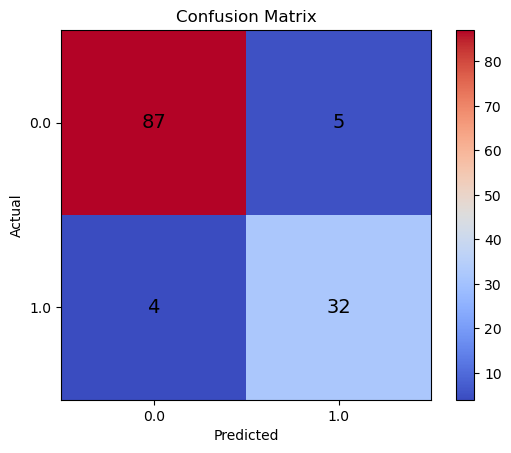

In [39]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('test.png')
plt.show()

In [40]:
print(set(str(clf._program).split()))

{'add(sin(X11),', 'X12),', 'X15))))),', 'sub(add(max(-0.345,', 'sub(X6,', 'neg(sub(add(max(-0.345,', 'tan(inv(log(add(X16,', 'X17)))))', 'neg(div(min(tan(X6),', 'inv(X19)))),', 'X15)))),', 'add(inv(tan(div(tan(inv(log(add(X16,', 'add(log(cos(add(sin(X11),', 'tan(inv(X19))))),', 'tan(inv(X19))))))),'}


Confusion Matrix:
[[337  16]
 [ 12 147]]


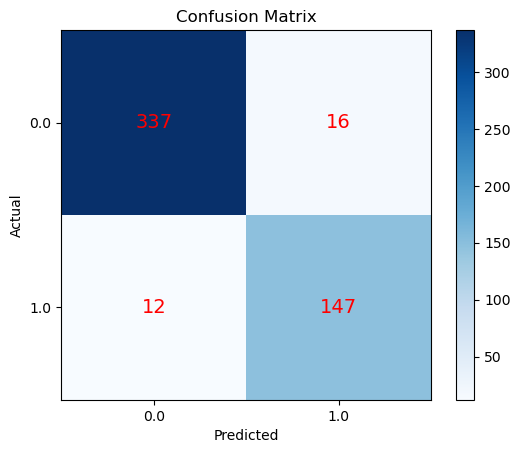

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)
plt.savefig('train.png')
plt.show()

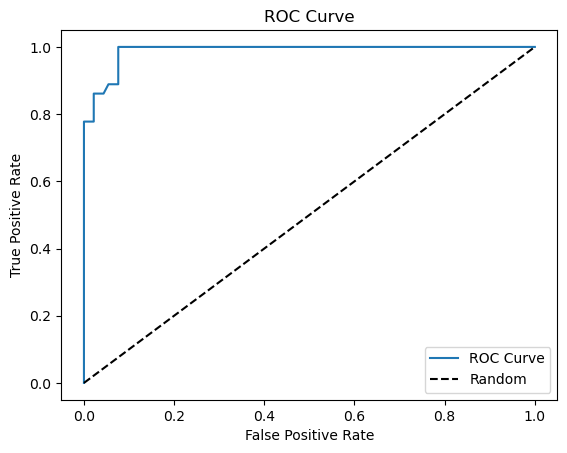

Accuracy: 0.9296875


In [42]:
# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('test_ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


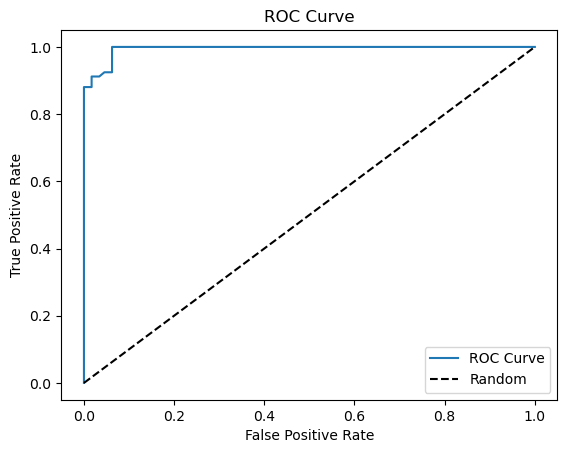

Accuracy: 0.9453125


In [43]:
# ROC Curve
y_probs = clf.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('train_ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_train, y_train)
print("Accuracy:", accuracy)


In [44]:
import pickle

# 保存训练好的模型
with open('symbol_clf_million.pkl', 'wb') as file:
    pickle.dump(clf, file)

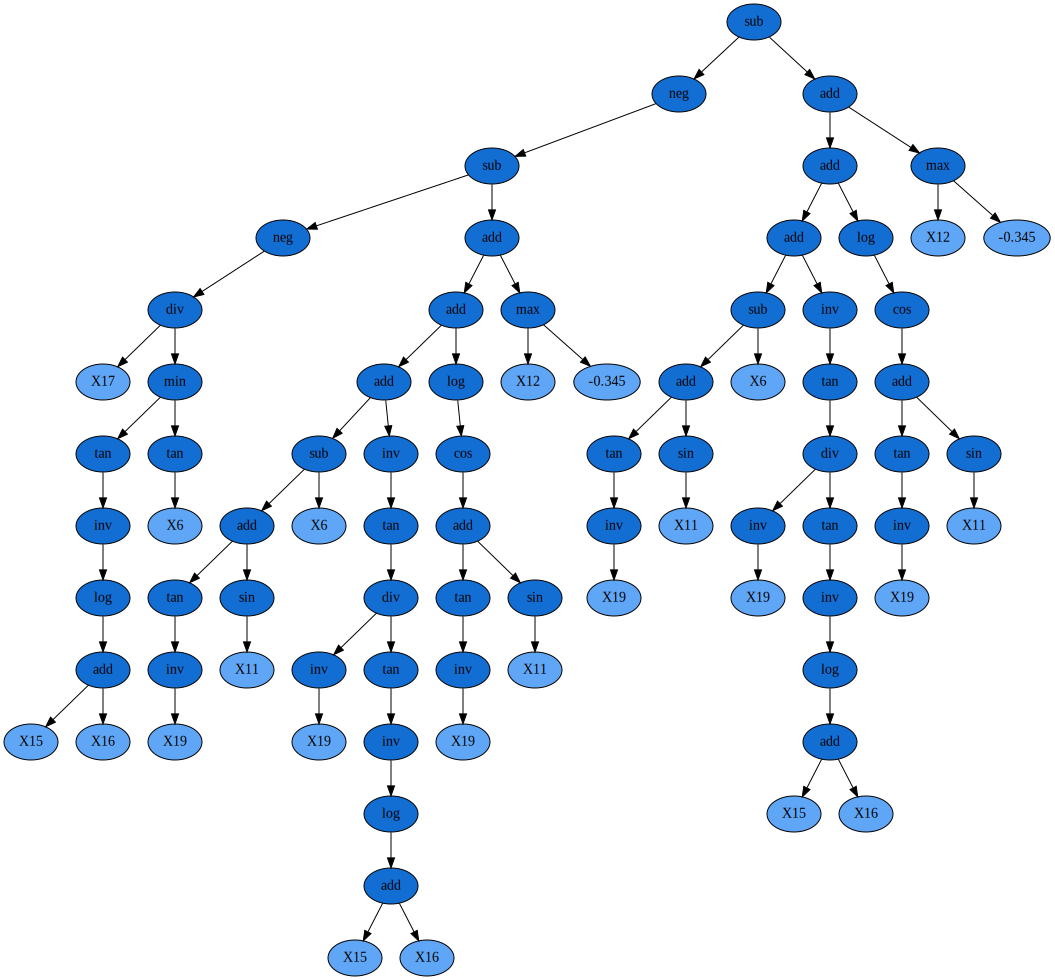

In [53]:
import graphviz
dot_data = clf._program.export_graphviz()
graph = graphviz.Source(dot_data)
# 渲染并保存为 文件
graph.render("tree")
graph
# from IPython.display import Image
# Image(filename='tree.png')

In [55]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [58]:
model = KeyedVectors.load_word2vec_format('million.txt')

# 获取所有词的词向量
word_vectors = model.vectors

In [59]:
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

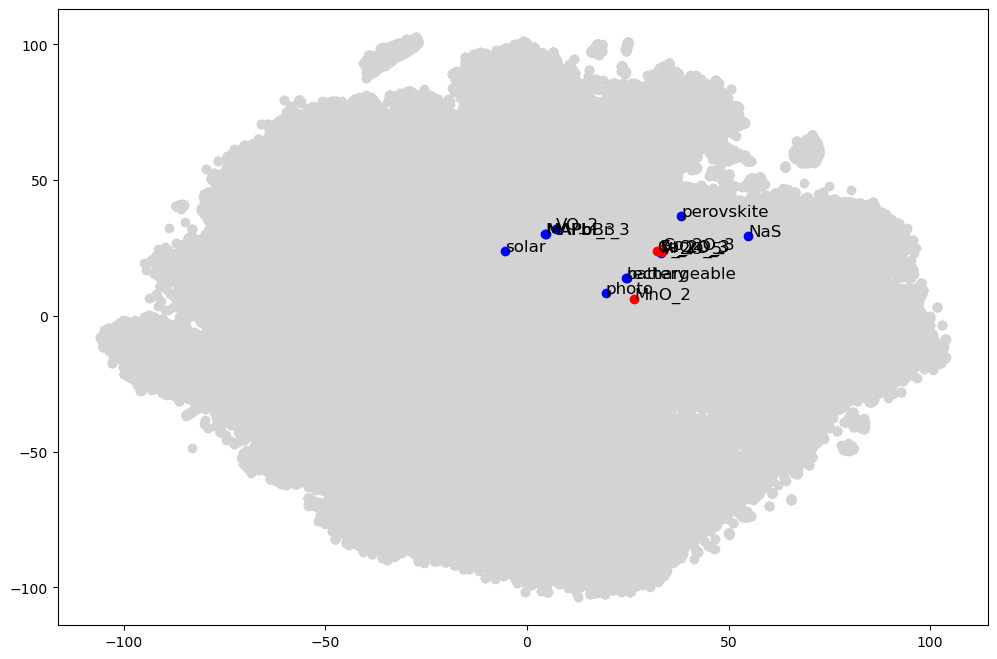

In [70]:
word_vectors = {}
for i, word in enumerate(model.index_to_key):
    word_vectors[word] = model.get_vector(word)
    
plt.figure(figsize=(12, 8))
dpi=2000
# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
highlight_words_blue = ['perovskite','MAPbI_3','MAPbBr_3','NaS','V_2O_5','VO_2','photo','battery','solar','rechargeable']  # 光充电材料,'PEA2PbI4'
highlight_words_red = ['Fe_2O_3','CuO','MnO_2','Al_2O_3','Co_2O_3']  # 红色高亮词汇
highlight_words_yellow = []  # 黄色高亮词汇 有机无机杂化钙钛矿
highlight_words_green = [] 
highlight_words_orange = [] #光催化 
# highlight_words_orange = ['SiO_2','MgO','La_2O_3','Cr_2O_3']  
# 遍历蓝色高亮词汇并绘制点
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='blue')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历红色高亮词汇并绘制点
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='red')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# plt.xlim(-17,-5)
# plt.ylim(-5,5)
# plt.rcParams['font.family'] = 'Times New Roman' 
plt.savefig('聚类无字.png')  # 保存为PNG格式
plt.show()
# 删除了：